In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import seaborn as sns

In [4]:
#importing the files as csv
from google.colab import files
uploaded = files.upload()

Saving frozen meals.csv to frozen meals (1).csv


In [5]:
#reading in the datasets
df1 = pd.read_csv('frozen meals.csv')

In [6]:
#for ts analysis
df1_ts = df1.copy()

In [7]:
df1_new = df1.copy()

In [8]:
#reading first 5 rows of df1
df1.head()

,REGION,WEEK ENDING,UPC,CATEGORY,PARENT,MANUFACTURER,BRAND,MAJOR BRAND,PRIVATE LABEL/NATIONAL,PRODUCT DESCRIPTION,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,4,28-01-2018,14854998001,DINNERS/ENTREES - FZ,PARENT 2,MANUFACTURER 19,BRAND 312,MAJOR BRAND 238,NATIONAL BRAND,PRODUCT 5938,ENTREE,TRAY,HOT / SPICY,238.0,520.10
1,1,04-02-2018,14854997630,DINNERS/ENTREES - FZ,PARENT 215,MANUFACTURER 222,BRAND 318,MAJOR BRAND 252,NATIONAL BRAND,PRODUCT 5754,CORN DOG,BOX,MEAT,147.0,883.33
2,1,11-02-2018,14854999434,DINNERS/ENTREES - FZ,PARENT 209,MANUFACTURER 213,BRAND 402,MAJOR BRAND 236,NATIONAL BRAND,PRODUCT 6647,ENTREE,TRAY,ASIAN,203.0,192.08
3,1,11-02-2018,14854998940,DINNERS/ENTREES - FZ,PARENT 203,MANUFACTURER 207,BRAND 322,MAJOR BRAND 256,NATIONAL BRAND,PRODUCT 6409,POCKET SANDWICH,BOX,MEAT,56.0,256.13
4,2,25-02-2018,14854999115,DINNERS/ENTREES - FZ,PARENT 208,MANUFACTURER 212,BRAND 294,MAJOR BRAND 232,NATIONAL BRAND,PRODUCT 6492,ENTREE,BOX,CHEESE,91.0,249.13


In [9]:
#for analysis during covid
df1_analysis_during = df1_new.copy()

In [10]:
#for analysis before covid
df1_analysis_before = df1_new.copy()

**OVER THE ENTIRE PERIOD**

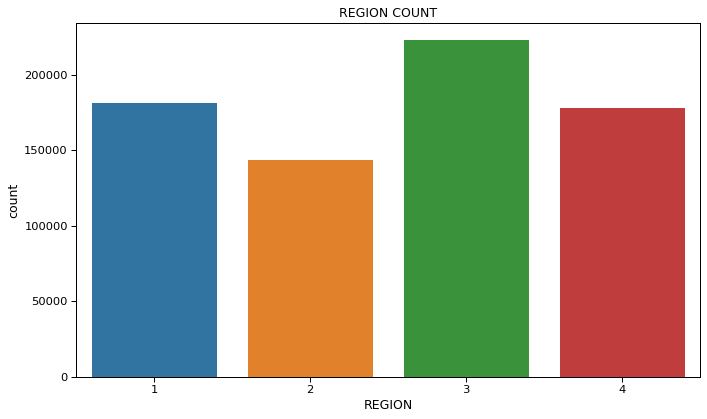

In [11]:
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df1,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

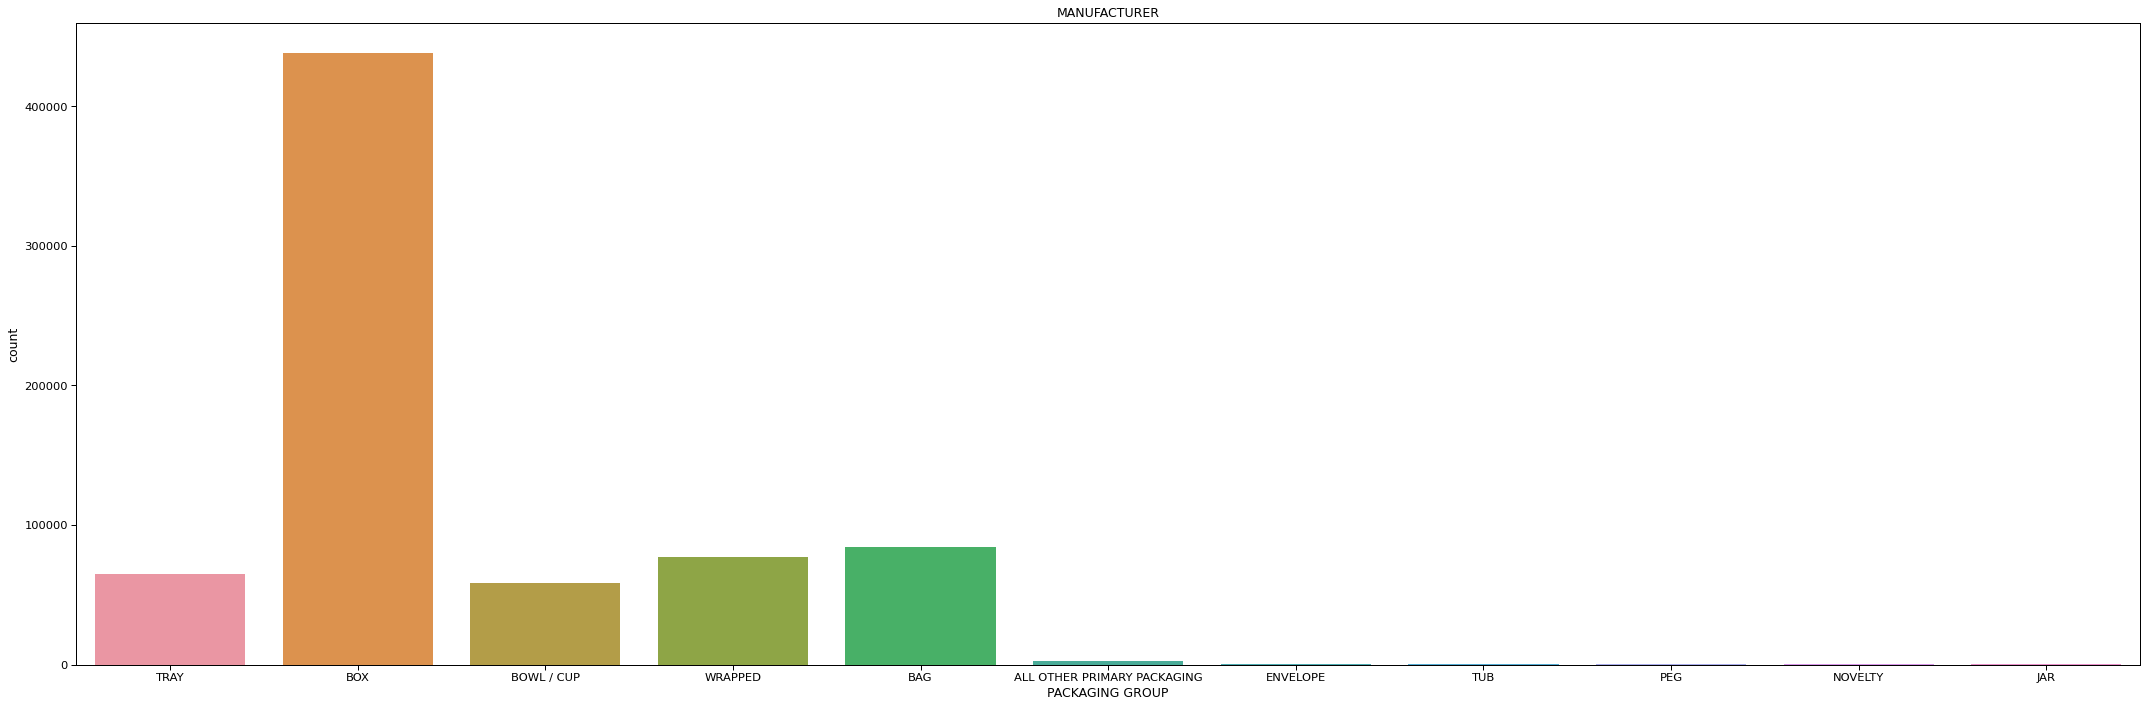

In [12]:
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df1,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

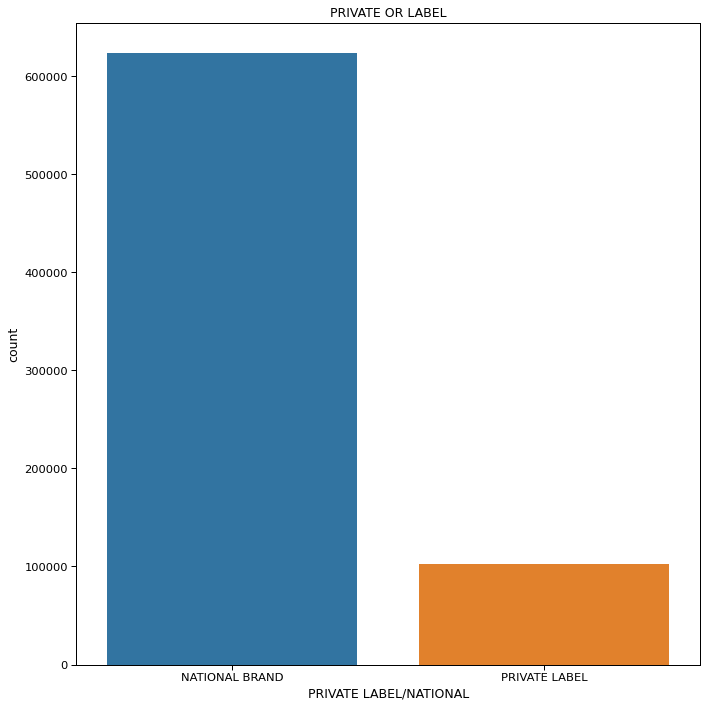

In [13]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df1,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

In [14]:
df1['WEEK ENDING'] = pd.to_datetime(df1['WEEK ENDING'])
#df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ac5cb7450>,
      dtype=object)

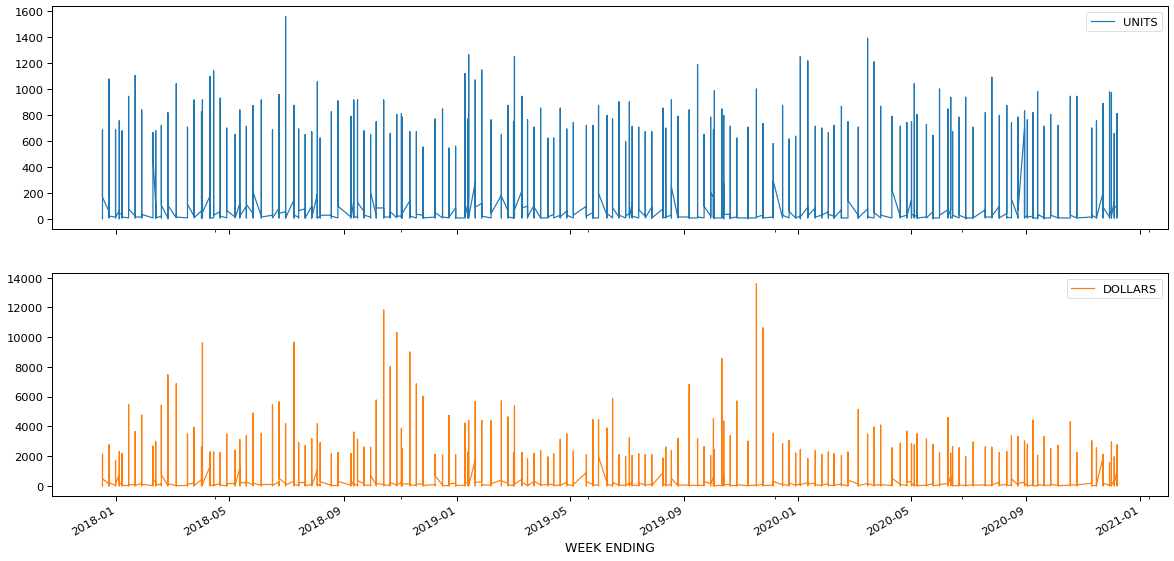

In [15]:
df1 = df1.set_index('WEEK ENDING')
df1_plot = df1[['UNITS','DOLLARS']]
df1_plot.plot(subplots=True,figsize=(20,10))

**BEFORE COVID**

In [16]:
#before covid time - CHECKING how the categorical
df1_analysis_before['WEEK ENDING'] = pd.to_datetime(df1_analysis_before['WEEK ENDING'])
date_frame_analysis_before = df1_analysis_before.set_index('WEEK ENDING')
df_covid_analysis_before = date_frame_analysis_before[(date_frame_analysis_before.index > '2017-12-17') & (date_frame_analysis_before.index <= '2020-03-13')]

In [17]:
#count before covid period
df_covid_analysis_before.count()

REGION                    545415
UPC                       545415
CATEGORY                  545415
PARENT                    545415
MANUFACTURER              545415
BRAND                     545415
MAJOR BRAND               545415
PRIVATE LABEL/NATIONAL    545415
PRODUCT DESCRIPTION       545415
PRODUCT TYPE              545415
PACKAGING GROUP           545415
PACKAGING GROUP2          545415
FLAVOR/SCENT              545415
UNITS                     545415
DOLLARS                   545415
dtype: int64

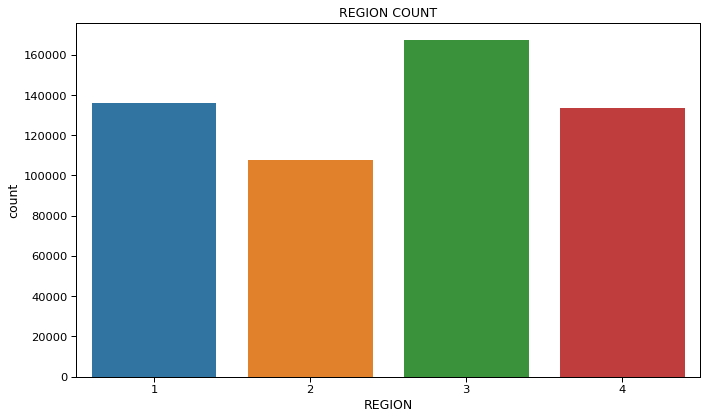

In [18]:
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

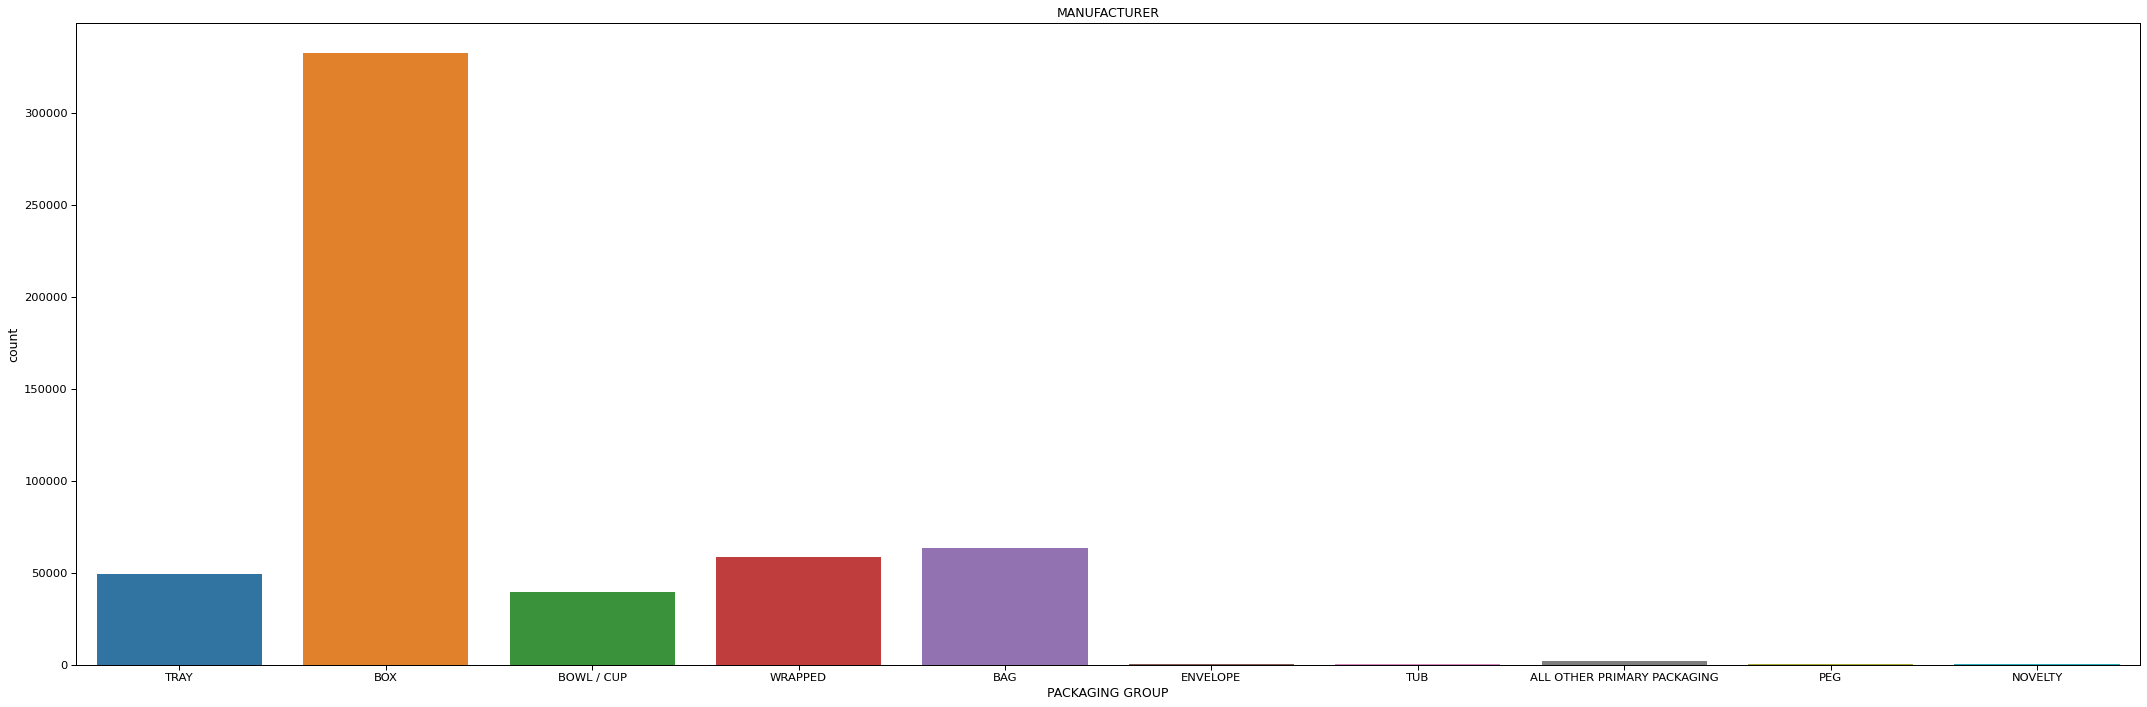

In [19]:
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

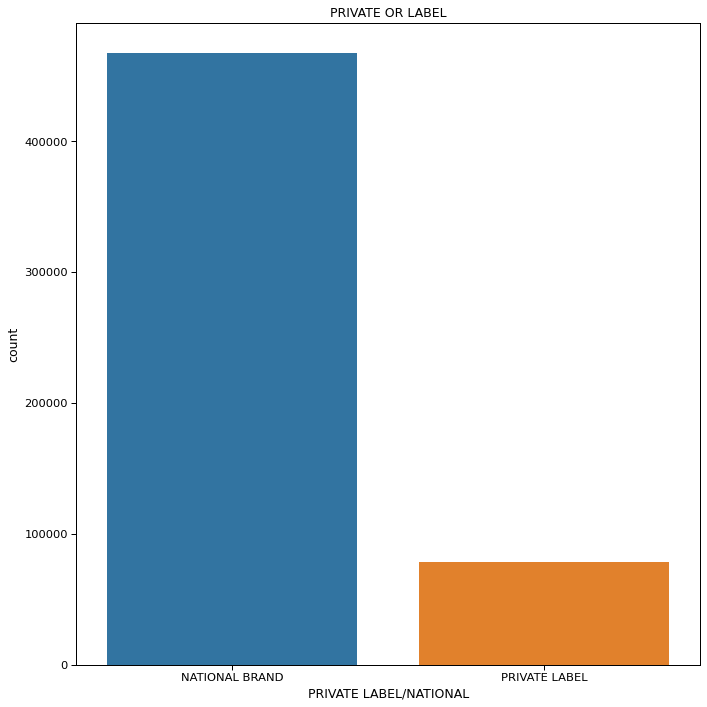

In [20]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

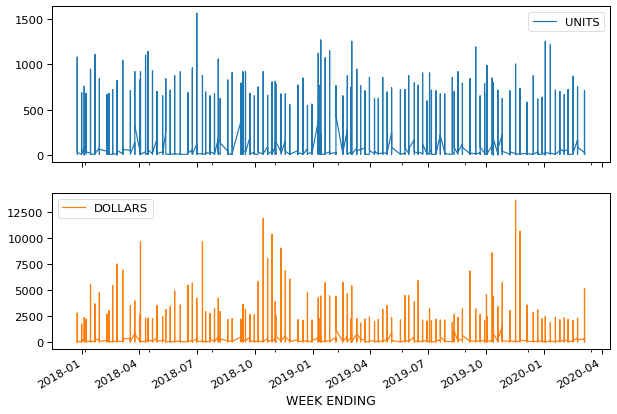

In [21]:
df_covid_plot= df_covid_analysis_before[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(10,7));

**DURING COVID**

In [22]:
#during covid time - CHECKING how the categorical
df1_analysis_during['WEEK ENDING'] = pd.to_datetime(df1_analysis_during['WEEK ENDING'])
date_frame_analysis_during = df1_analysis_during.set_index('WEEK ENDING')
df_covid_analysis_during = date_frame_analysis_during[(date_frame_analysis_during.index > '2020-03-14') & (date_frame_analysis_during.index <= '2020-12-06')]

In [23]:
#count during covid period
df_covid_analysis_during.count()

REGION                    171536
UPC                       171536
CATEGORY                  171536
PARENT                    171536
MANUFACTURER              171536
BRAND                     171536
MAJOR BRAND               171536
PRIVATE LABEL/NATIONAL    171536
PRODUCT DESCRIPTION       171536
PRODUCT TYPE              171536
PACKAGING GROUP           171536
FLAVOR/SCENT              171536
UNITS                     171536
DOLLARS                   171536
dtype: int64

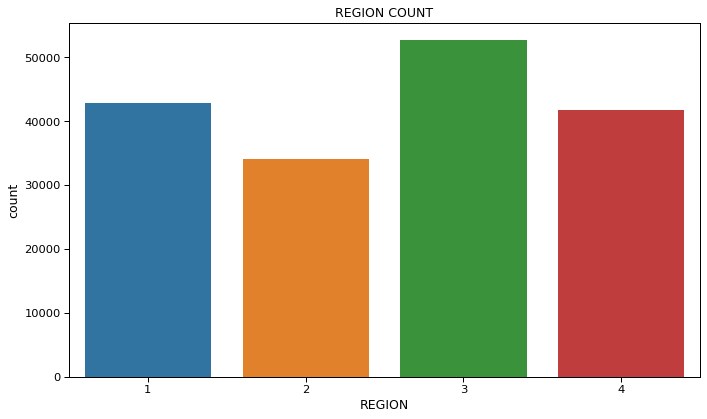

In [24]:
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

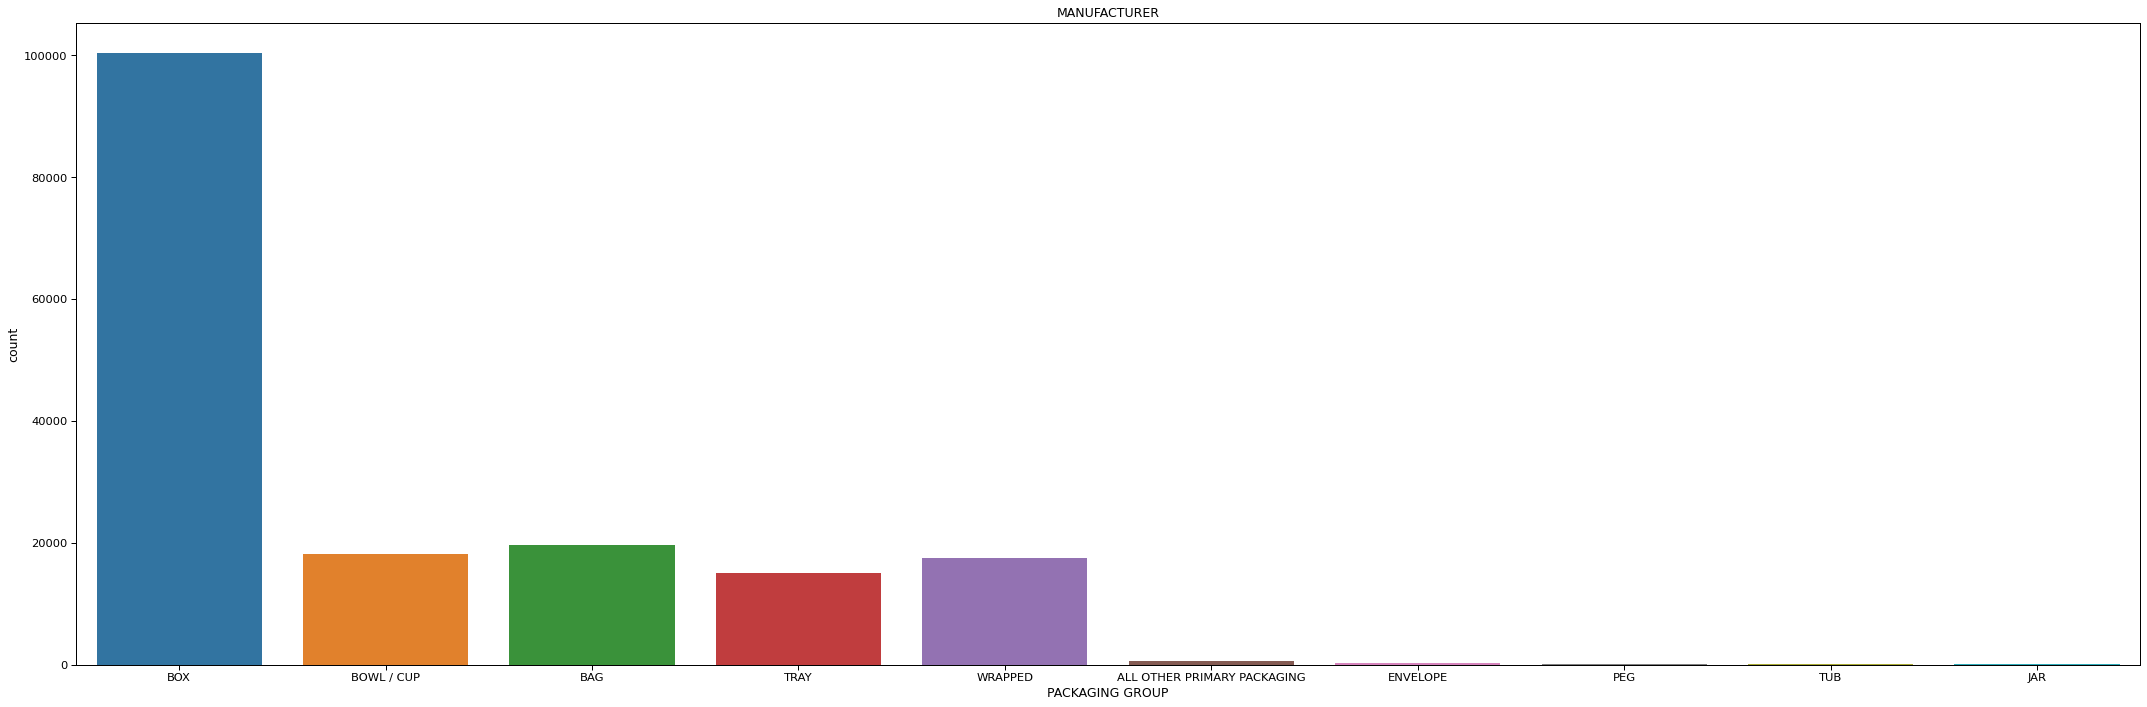

In [25]:
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

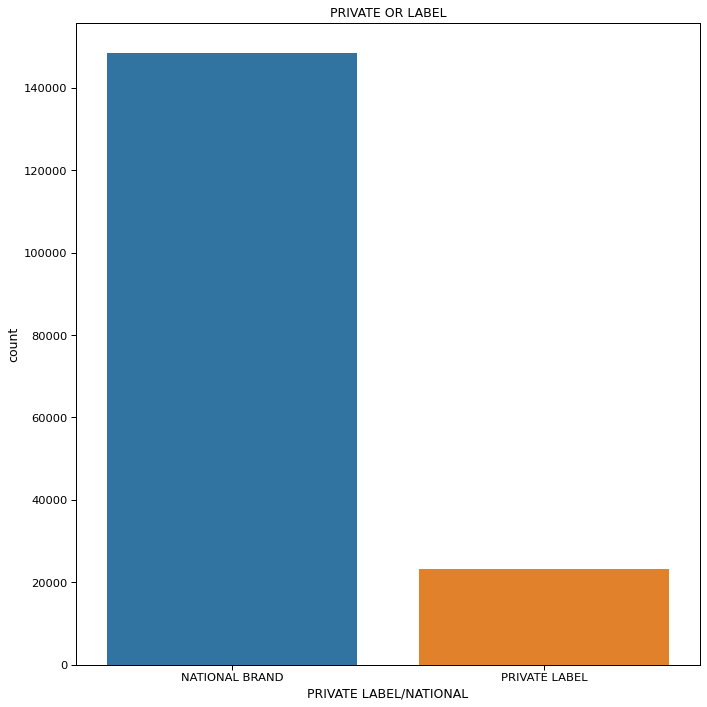

In [26]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

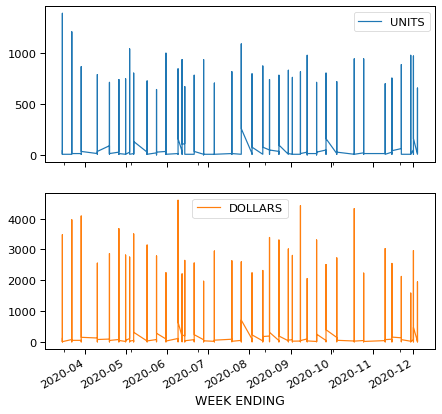

In [27]:
df_covid_plot= df_covid_analysis_during[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(7,7));

**GENERAL ANALYSIS**

In [28]:
print(df1.shape)
print(df1.columns)
print(df1.isnull().any())
print(df1.nunique())

(725936, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5972
CATEGORY                      1
PARENT                      489
MANUFACTURER                526
BRAND                       793
MAJOR BRAND                 617
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5

In [29]:
df1.describe()

,REGION,UPC,UNITS,DOLLARS
count,725936.000000,7.259360e+05,725936.000000,725936.000000
mean,2.547482,1.485500e+10,42.831886,134.826147
std,1.112259,2.112804e+03,63.163012,188.627256
min,1.000000,1.485500e+10,0.388889,0.000000
25%,2.000000,1.485500e+10,7.000000,34.930000
50%,3.000000,1.485500e+10,21.000000,71.960000
75%,3.000000,1.485500e+10,49.000000,158.130000
max,4.000000,1.485501e+10,1561.000000,13608.490000


In [30]:
df1_new.head()

,REGION,WEEK ENDING,UPC,CATEGORY,PARENT,MANUFACTURER,BRAND,MAJOR BRAND,PRIVATE LABEL/NATIONAL,PRODUCT DESCRIPTION,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,4,28-01-2018,14854998001,DINNERS/ENTREES - FZ,PARENT 2,MANUFACTURER 19,BRAND 312,MAJOR BRAND 238,NATIONAL BRAND,PRODUCT 5938,ENTREE,TRAY,HOT / SPICY,238.0,520.10
1,1,04-02-2018,14854997630,DINNERS/ENTREES - FZ,PARENT 215,MANUFACTURER 222,BRAND 318,MAJOR BRAND 252,NATIONAL BRAND,PRODUCT 5754,CORN DOG,BOX,MEAT,147.0,883.33
2,1,11-02-2018,14854999434,DINNERS/ENTREES - FZ,PARENT 209,MANUFACTURER 213,BRAND 402,MAJOR BRAND 236,NATIONAL BRAND,PRODUCT 6647,ENTREE,TRAY,ASIAN,203.0,192.08
3,1,11-02-2018,14854998940,DINNERS/ENTREES - FZ,PARENT 203,MANUFACTURER 207,BRAND 322,MAJOR BRAND 256,NATIONAL BRAND,PRODUCT 6409,POCKET SANDWICH,BOX,MEAT,56.0,256.13
4,2,25-02-2018,14854999115,DINNERS/ENTREES - FZ,PARENT 208,MANUFACTURER 212,BRAND 294,MAJOR BRAND 232,NATIONAL BRAND,PRODUCT 6492,ENTREE,BOX,CHEESE,91.0,249.13


In [31]:
#we will be dropping this column and we wont be taking this our prediction
df1_new['UPC'].value_counts()

14854997957    624
14854997733    624
14854997645    624
14854998251    624
14854998280    624
14854997569    624
14854998054    624
14854997514    624
14854999211    624
14854998583    624
14854998034    624
14854997522    624
14854997972    624
14854997730    624
14854997755    624
14854997909    624
14854997649    624
14854998081    624
14854998332    624
14854997820    624
14854998416    624
14854997805    624
14854998046    624
14854997659    624
14854998645    624
14854998427    624
14854997515    624
14854997680    624
14854997710    624
14854998405    624
14854998044    624
14854997867    624
14854997555    624
14854997949    624
14854997721    624
14854997720    624
14854998605    624
14854997741    624
14854997931    624
14854997727    624
14854997637    624
14854998149    624
14854997935    624
14854998659    624
14854998615    624
14854999370    624
14854998121    624
14854998006    624
14854998556    624
14854997784    624
14854998004    624
14854998822    623
14854998424 

In [32]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['PARENT'].value_counts()

PARENT 2         164837
PARENT 203       135320
PRIVATE LABEL    102667
PARENT 208        47928
PARENT 209        43562
PARENT 206        28204
PARENT 47         19282
PARENT 211        17919
PARENT 222        16781
PARENT 204        12128
PARENT 216         9202
PARENT 212         7505
PARENT 225         7059
PARENT 219         5654
PARENT 221         4902
PARENT 217         4608
PARENT 228         4388
PARENT 226         3951
PARENT 229         3835
PARENT 234         3564
PARENT 215         3081
PARENT 69          3009
PARENT 61          2861
PARENT 256         2591
PARENT 213         2497
PARENT 210         2488
PARENT 246         2133
PARENT 241         2019
PARENT 253         1974
PARENT 205         1969
PARENT 227         1907
PARENT 266         1783
PARENT 255         1672
PARENT 252         1492
PARENT 250         1394
PARENT 237         1306
PARENT 231         1246
PARENT 236         1213
PARENT 260         1199
PARENT 232         1171
PARENT 285         1156
PARENT 230      

In [33]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['MANUFACTURER'].value_counts()

MANUFACTURER 207    130272
MANUFACTURER 19     129624
PRIVATE LABEL       102667
MANUFACTURER 212     45158
MANUFACTURER 213     43562
MANUFACTURER 210     28204
MANUFACTURER 2       19503
MANUFACTURER 48      19251
MANUFACTURER 216     17919
MANUFACTURER 215     12274
MANUFACTURER 208     11785
MANUFACTURER 224      9202
MANUFACTURER 230      8206
MANUFACTURER 217      7505
MANUFACTURER 233      7059
MANUFACTURER 235      6755
MANUFACTURER 227      5654
MANUFACTURER 229      4902
MANUFACTURER 220      4791
MANUFACTURER 225      4608
MANUFACTURER 237      4388
MANUFACTURER 234      3951
MANUFACTURER 238      3835
MANUFACTURER 244      3531
MANUFACTURER 222      3027
MANUFACTURER 71       3009
MANUFACTURER 223      2706
MANUFACTURER 62       2663
MANUFACTURER 269      2591
MANUFACTURER 214      2488
MANUFACTURER 221      2214
MANUFACTURER 257      2133
MANUFACTURER 218      2132
MANUFACTURER 252      2019
MANUFACTURER 266      1974
MANUFACTURER 209      1969
MANUFACTURER 236      1907
M

In [34]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['BRAND'].value_counts()

PRIVATE LABEL    103048
BRAND 286         40240
BRAND 301         28925
BRAND 322         22888
BRAND 284         19062
BRAND 292         17282
BRAND 294         15235
BRAND 321         14630
BRAND 298         14377
BRAND 330         13137
BRAND 306         13020
BRAND 312         11705
BRAND 287         11316
BRAND 282         10820
BRAND 285         10818
BRAND 370          9368
BRAND 302          9161
BRAND 293          9012
BRAND 299          8948
BRAND 304          8668
BRAND 361          8309
BRAND 308          7505
BRAND 289          7305
BRAND 320          7190
BRAND 297          6740
BRAND 338          6579
BRAND 351          6239
BRAND 332          5949
BRAND 324          5856
BRAND 305          5672
BRAND 328          5654
BRAND 296          5122
BRAND 334          4902
BRAND 283          4465
BRAND 337          4326
BRAND 345          4134
BRAND 2            4097
BRAND 357          3978
BRAND 350          3951
BRAND 325          3935
BRAND 348          3701
BRAND 372       

In [35]:
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      102667
MAJOR BRAND 225     49504
MAJOR BRAND 239     31021
MAJOR BRAND 223     25610
MAJOR BRAND 232     23686
MAJOR BRAND 256     22913
MAJOR BRAND 236     21077
MAJOR BRAND 54      19251
MAJOR BRAND 230     17282
MAJOR BRAND 255     14630
MAJOR BRAND 238     13893
MAJOR BRAND 262     13137
MAJOR BRAND 244     13020
MAJOR BRAND 226     11785
MAJOR BRAND 222     10820
MAJOR BRAND 224     10818
MAJOR BRAND 293     10023
MAJOR BRAND 240      9161
MAJOR BRAND 237      9022
MAJOR BRAND 231      9012
MAJOR BRAND 284      8743
MAJOR BRAND 242      8668
MAJOR BRAND 243      8137
MAJOR BRAND 254      7768
MAJOR BRAND 245      7505
MAJOR BRAND 234      7028
MAJOR BRAND 235      6740
MAJOR BRAND 268      6579
MAJOR BRAND 228      6399
MAJOR BRAND 258      6396
MAJOR BRAND 277      6239
MAJOR BRAND 263      5949
MAJOR BRAND 260      5654
MAJOR BRAND 265      4902
MAJOR BRAND 2        4827
MAJOR BRAND 286      4705
MAJOR BRAND 267      4326
MAJOR BRAND 266      4182
MAJOR BRAND 

In [36]:
#we will be encoding this column for further analysis and it helps in our prediction
df1_new['PRIVATE LABEL/NATIONAL'].value_counts()

NATIONAL BRAND    623269
PRIVATE LABEL     102667
Name: PRIVATE LABEL/NATIONAL, dtype: int64

In [37]:
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 5810     624
PRODUCT 5696     624
PRODUCT 5956     624
PRODUCT 5793     624
PRODUCT 5923     624
PRODUCT 6075     624
PRODUCT 6544     624
PRODUCT 5722     624
PRODUCT 5957     624
PRODUCT 5770     624
PRODUCT 5713     624
PRODUCT 6269     624
PRODUCT 5799     624
PRODUCT 5816     624
PRODUCT 5890     624
PRODUCT 5699     624
PRODUCT 6062     624
PRODUCT 6149     624
PRODUCT 5695     624
PRODUCT 5962     624
PRODUCT 5798     624
PRODUCT 5804     624
PRODUCT 5902     624
PRODUCT 5802     624
PRODUCT 5939     624
PRODUCT 6241     624
PRODUCT 6138     624
PRODUCT 5974     624
PRODUCT 5757     624
PRODUCT 5952     624
PRODUCT 6262     624
PRODUCT 6619     624
PRODUCT 5847     624
PRODUCT 5912     624
PRODUCT 5805     624
PRODUCT 5996     624
PRODUCT 6228     624
PRODUCT 5764     624
PRODUCT 6213     624
PRODUCT 6102     624
PRODUCT 5761     624
PRODUCT 6248     624
PRODUCT 6010     624
PRODUCT 5829     624
PRODUCT 6144     624
PRODUCT 5781     624
PRODUCT 5838     624
PRODUCT 5904 

In [38]:
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df1_new['REGION'].value_counts()

3    223154
1    181313
4    177798
2    143671
Name: REGION, dtype: int64

In [39]:
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df1_new['PRODUCT TYPE'].value_counts()

ENTREE                 507822
BURRITO                 39140
DINNER                  34506
POCKET SANDWICH         33411
SANDWICH                26810
CORN DOG                17301
CHEESEBURGER            13097
CHIMICHANGA             11005
TAMALE                   3660
EMPANADA                 3640
STROMBOLI                3288
QUESADILLA               3082
TACO                     2628
SLIDER                   2611
SANDWICH WRAP            1826
PANINI SANDWICH          1750
HAMBURGER                1727
SUBMARINE SANDWICH       1654
CALZONE                  1442
TURNOVER                 1397
PRETZEL DOG              1357
TAQUITO                  1284
PUPUSA                   1237
PASTY                     778
CHEESEBURGER SLIDER       688
BAGEL DOG                 668
PANINI                    620
CHICKEN SANDWICH          535
KOLACHE                   532
ENCHILADA                 469
HOT DOG                   453
SIOPAO                    422
AREPAS                    419
BUREK     

In [40]:
#similarly after encoding this column we will be taking this column for prediction
df1_new['PACKAGING GROUP'].value_counts()

BOX                            438000
BAG                             83986
WRAPPED                         76984
TRAY                            65147
BOWL / CUP                      58058
ALL OTHER PRIMARY PACKAGING      2720
ENVELOPE                          533
TUB                               319
PEG                               184
NOVELTY                             4
JAR                                 1
Name: PACKAGING GROUP, dtype: int64

In [41]:
#similarly after encoding this column we will be taking this column for prediction
df1_new['FLAVOR/SCENT'].value_counts()

MEAT                      194998
POULTRY                   143661
ALL OTHER FLAVOR/SCENT     99216
CHEESE                     86014
VEGETABLE                  37369
TANGY                      28205
ASIAN                      27317
HOT / SPICY                23374
MEXICAN                    18509
FRUIT                      14972
HERB & SPICE               14971
SEAFOOD                    12857
PEANUT BUTTER               7453
SWEET                       6378
FISH                        3613
MUSHROOM                    2753
CHOCOLATE                   1165
NUT & SEED                   892
LIQUOR / LIQUEUR             877
NEW ORLEANS                  674
GRAIN                        487
SMOKED                        58
VINEGAR / VINAIGRETTE         54
PLAIN                         53
EGG                           16
Name: FLAVOR/SCENT, dtype: int64

In [42]:
df1_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)

In [43]:
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df1_new.head()

,REGION,WEEK ENDING,PRIVATE LABEL/NATIONAL,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,4,28-01-2018,NATIONAL BRAND,ENTREE,TRAY,HOT / SPICY,238.0,520.10
1,1,04-02-2018,NATIONAL BRAND,CORN DOG,BOX,MEAT,147.0,883.33
2,1,11-02-2018,NATIONAL BRAND,ENTREE,TRAY,ASIAN,203.0,192.08
3,1,11-02-2018,NATIONAL BRAND,POCKET SANDWICH,BOX,MEAT,56.0,256.13
4,2,25-02-2018,NATIONAL BRAND,ENTREE,BOX,CHEESE,91.0,249.13


In [44]:
#renaming the columns
df1_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)

In [45]:
df1_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS
0,4,28-01-2018,NATIONAL BRAND,ENTREE,TRAY,HOT / SPICY,238.0,520.10
1,1,04-02-2018,NATIONAL BRAND,CORN DOG,BOX,MEAT,147.0,883.33
2,1,11-02-2018,NATIONAL BRAND,ENTREE,TRAY,ASIAN,203.0,192.08
3,1,11-02-2018,NATIONAL BRAND,POCKET SANDWICH,BOX,MEAT,56.0,256.13
4,2,25-02-2018,NATIONAL BRAND,ENTREE,BOX,CHEESE,91.0,249.13


In [46]:
# Here we are encoding the columns that we want to include in our analysis
df1_new['PRODUCTLABEL'] = df1_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)

In [47]:
from sklearn.preprocessing import LabelEncoder
df1_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df1_new.PRODUCTTYPE)
df1_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df1_new.PACKAGINGGROUP)
df1_new['SCENT'] = LabelEncoder().fit_transform(df1_new.SCENT)

In [48]:
df1_new['PRODUCTTYPE'].value_counts()

26    507822
5      39140
21     34506
52     33411
58     26810
18     17301
11     13097
17     11005
67      3660
23      3640
63      3288
55      3082
65      2628
61      2611
59      1826
37      1750
29      1727
64      1654
7       1442
69      1397
53      1357
68      1284
54      1237
42       778
12       688
1        668
36       620
13       535
33       532
25       469
31       453
60       422
0        419
3        414
24       397
47       389
51       369
56       303
32       291
27       242
22       224
50       212
35       194
14       194
8        170
71       164
57       151
49       136
44       116
4        112
9        109
43        91
45        80
38        54
70        51
34        43
46        25
19        25
48        24
62        15
39        13
16        12
30        11
41        10
40         9
6          8
66         4
2          3
20         3
10         3
28         3
15         1
72         1
73         1
Name: PRODUCTTYPE, dtype: int64

In [49]:
df1_new['PACKAGINGGROUP'].value_counts()

3     438000
1      83986
10     76984
8      65147
2      58058
0       2720
4        533
9        319
7        184
6          4
5          1
Name: PACKAGINGGROUP, dtype: int64

In [50]:
df1_new['SCENT'].value_counts()

11    194998
18    143661
0      99216
2      86014
23     37369
22     28205
1      27317
9      23374
12     18509
6      14972
8      14971
19     12857
16      7453
21      6378
5       3613
13      2753
3       1165
15       892
10       877
14       674
7        487
20        58
24        54
17        53
4         16
Name: SCENT, dtype: int64

In [51]:
df1_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS
0,4,28-01-2018,1,26,8,9,238.0,520.10
1,1,04-02-2018,1,18,3,11,147.0,883.33
2,1,11-02-2018,1,26,8,1,203.0,192.08
3,1,11-02-2018,1,52,3,11,56.0,256.13
4,2,25-02-2018,1,26,3,2,91.0,249.13


In [52]:
df1_new['PPU'] = df1_new['DOLLARS']/df1_new['UNITS']
df1_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU
0,4,28-01-2018,1,26,8,9,238.0,520.10,2.185294
1,1,04-02-2018,1,18,3,11,147.0,883.33,6.009048
2,1,11-02-2018,1,26,8,1,203.0,192.08,0.946207
3,1,11-02-2018,1,52,3,11,56.0,256.13,4.573750
4,2,25-02-2018,1,26,3,2,91.0,249.13,2.737692


In [53]:
df1_new.count()

REGION            725936
DATE              725936
PRODUCTLABEL      725936
PRODUCTTYPE       725936
PACKAGINGGROUP    725936
SCENT             725936
UNITS             725936
DOLLARS           725936
PPU               725936
dtype: int64

In [56]:
df1_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU
0,4,28-01-2018,1,26,8,9,238.0,520.10,2.185294
1,1,04-02-2018,1,18,3,11,147.0,883.33,6.009048
2,1,11-02-2018,1,26,8,1,203.0,192.08,0.946207
3,1,11-02-2018,1,52,3,11,56.0,256.13,4.573750
4,2,25-02-2018,1,26,3,2,91.0,249.13,2.737692


In [57]:
df1_new[["month","date","year"]] = df1_new["DATE"].str.split("-", expand=True)

In [58]:
df1_new.drop(['DATE'], axis=1, inplace=True)
df1_new.head()

,REGION,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU,month,date,year
0,4,1,26,8,9,238.0,520.10,2.185294,28,01,2018
1,1,1,18,3,11,147.0,883.33,6.009048,04,02,2018
2,1,1,26,8,1,203.0,192.08,0.946207,11,02,2018
3,1,1,52,3,11,56.0,256.13,4.573750,11,02,2018
4,2,1,26,3,2,91.0,249.13,2.737692,25,02,2018


In [59]:
X=df1_new.drop(['UNITS', 'DOLLARS'],axis=1).values
y=df1_new['UNITS'].values

In [60]:
X

array([[4, 1, 26, ..., '28', '01', '2018'],
       [1, 1, 18, ..., '04', '02', '2018'],
       [1, 1, 26, ..., '11', '02', '2018'],
       ...,
       [3, 1, 67, ..., '26', '04', '2020'],
       [1, 1, 26, ..., '11', '10', '2020'],
       [2, 1, 26, ..., '18', '10', '2020']], dtype=object)

In [61]:
y

array([238., 147., 203., ...,   7.,   7.,   7.])

In [62]:
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)

In [63]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)

**Linear Regression**

In [64]:
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)

For choosing the best model, we will consider RMSE as evaluation metric, because RMSE accounts for large errors and in general it is usually best to report RMSE rather than MSE because RMSE is measured in same units as the data rather than the MSE which is measured in squared units

In [65]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
df1_predict = l_model.predict(X_test)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print("The RMSE for test set is "+str(rmse(df1_predict,y_test)))

The RMSE for test set is 60.76709947812078


In [66]:
print('intercept:', l_model.intercept_)
print('slope:', l_model.coef_)

intercept: 43.050320892009736
slope: [   2.3032663    23.21083528  -14.16740302   12.65561532    6.09855019
 -329.38595694   -2.37457296   -5.37386053    0.99722717]


**Ridge Regression**

In [67]:
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=10, return_train_score= True)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)

{'alpha': 0.1}


In [68]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.1)
ridge_model=ridge_1.fit(X_train,y_train)

In [69]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
ridge1_predict = ridge_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(ridge1_predict,y_test)))

The RMSE for test set is 60.767096747983004


In [70]:
print('intercept:', ridge_model.intercept_)
print('slope:', ridge_model.coef_)

intercept: 43.048714724229804
slope: [   2.30316864   23.21082271  -14.16815937   12.6556677     6.09844202
 -329.3526896    -2.37456862   -5.37388125    0.99712425]


**Lasso Regression**

In [71]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)

{'alpha': 0.01}


In [72]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model=lasso_1.fit(X_train,y_train)

In [73]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
lasso1_predict = lasso_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(lasso1_predict,y_test)))

The RMSE for test set is 60.767233259763636


In [74]:
print('intercept:', lasso_model.intercept_)
print('slope:', lasso_model.coef_)

intercept: 42.819541601193436
slope: [   2.21951646   23.13817494  -13.92932392   12.55016313    5.96016907
 -323.99501203   -2.26329959   -5.28902703    0.86984646]


In [75]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)

tree_predict1 = tree1.predict(X_test)

print("The RMSE for test set is "+str(rmse(tree_predict1,y_test)))

The RMSE for test set is 64.94906329314333


From above results we can see that the RMSE is almost same for all the models and we can use Linear regression for prediction as it has the least RMSE. We can see that the p-value of all variables are significant and have impact on the units variable. We are using FBprophet for forecasting future average sales.

In [76]:
import statsmodels.api as sm
ols1 = sm.add_constant(X_train)
est1 = sm.OLS(y_train, ols1)
estf1 = est1.fit()
print(estf1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4956.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        01:43:02   Log-Likelihood:            -3.0082e+06
No. Observations:              544452   AIC:                         6.016e+06
Df Residuals:                  544442   BIC:                         6.017e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0503      0.453     94.957      0.0

In [77]:
!pip install fbprophet

In [78]:
ts_analysis1 = df1_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis1['WEEK ENDING'] = pd.to_datetime(ts_analysis1['WEEK ENDING'])
ts_df1 = ts_analysis1.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()

In [79]:
ts_df1 = ts_df1.reset_index()
ts_df1 = ts_df1.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


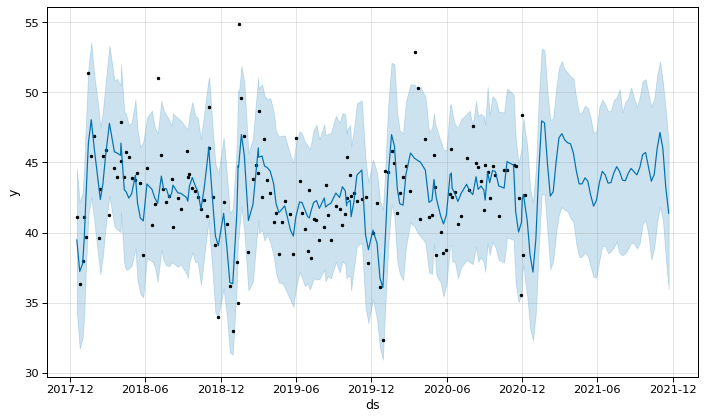

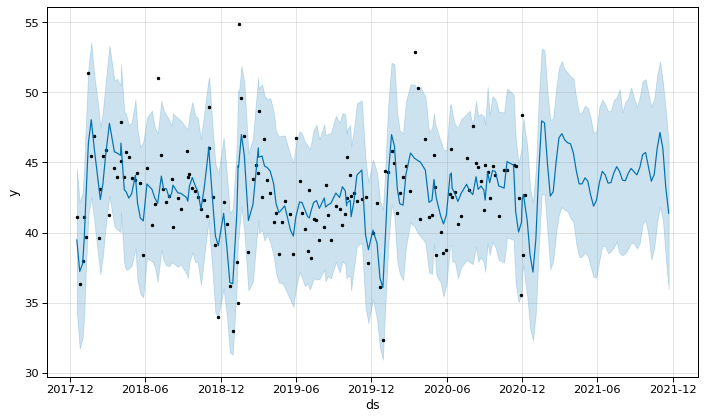

In [80]:
from fbprophet import Prophet
m1 = Prophet(interval_width=0.95)
m1.fit(ts_df1)
future1 = m1.make_future_dataframe(periods = 50,freq='W')
forecast1 = m1.predict(future1)
#We are plotting the forecast for next few weeks 
m1.plot(forecast1)

In [81]:
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

            ds       yhat  yhat_lower  yhat_upper
156 2020-12-13  40.861851   35.474966   46.239634
157 2020-12-20  38.388703   33.202064   43.169121
158 2020-12-27  37.186501   32.309489   42.155736
159 2021-01-03  39.545913   34.301928   44.521902
160 2021-01-10  44.361022   38.850090   49.511190
161 2021-01-17  47.969437   42.711658   53.115379
162 2021-01-24  47.821126   42.732890   53.008696
163 2021-01-31  44.942731   40.083723   50.056929
164 2021-02-07  42.606181   37.377586   48.035507
165 2021-02-14  42.901063   37.965240   48.130940
166 2021-02-21  45.019173   39.934245   50.234822
167 2021-02-28  46.758200   41.318366   51.747327
168 2021-03-07  47.053766   41.817404   52.251103
169 2021-03-14  46.611448   41.611512   51.611628
170 2021-03-21  46.406007   41.506318   51.432026
171 2021-03-28  46.334105   41.023534   51.132043
172 2021-04-04  45.673349   40.755376   51.017632
173 2021-04-11  44.412961   39.170170   49.547212
174 2021-04-18  43.468606   38.243196   48.491607


Below we can see the trends with respect to year and months in the year. The first graph represents an increasing trend as we progress in the years and the latter shows a fluctuating trend in the monthly frozen meals sales. For some months it is low while for some it is high. We can see January, March and November has highest sales. Overall, Tuesdays and Fridays have the highest sales in a week.



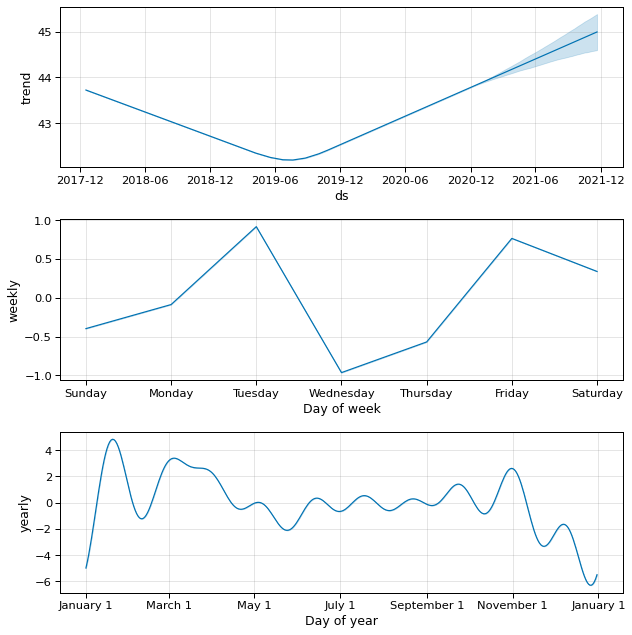

In [82]:
#Plots to find if there is any seasonality
fig1 = m1.plot_components(forecast1)